# 📈Introduction to Inferential Statistics📉

In this notebook we're gonna be looking at some of the modern methods that is used in the field of inferential statistics. 

What we're gonna cover:
* AB-Test
* T-Test
    * One sample
    * Independent
    * Relative
* U-Test
    * two-sided
    * greater
    * less
* Normality Tests
    * Shapiro
    * Probability Plot
* Chi2 Test

## AB-Test
Imagine someone claims that they made a medicine that can cure Covid-19!

Let's suppose that we bring enough people for the experiment as samples based on MSS (Minimum Sample Size).

And Let's suppose that the results would show that 80% of the sick people who used this medicine got better.

Now can we claim that the medicine is 80% effective? Well no! we can't.

You see, we need an indicator to compare our medicine results with.

And that's when the AB-Test shows up!

These people that used medicine is in the `test group (Group A)`. Now we need some people that didn't really took that medicine (or they just think that they took it) in order to actually see the difference! Let's call them `control group (Group B)`

Imagine the result of Group B is 70%. 

Now there is a big question you gotta ask yourself: "Is this 10% difference logical from the prespective of statistics?" Meaning: "We know that the results of the Group A is better by 10%. Is this difference reasonable?"

In order to be able to answer this question, we need to repeat this experiment with different random people several times! which takes a lot of time, and costs a lot of money! So in this situation, we need to somehow simulate the experiment.

And that's why we use the `T-Test`

## T-Test 
T-test is a really nice way to simulate your experiments several times. At the end, it would give you a parameter called `P Value`. This number shows how much T-Test thinks that the difference between groups A and B is by chance! 

**Note:** You need to pass these 2 conditions in order to be able to use T-Test:
1. The data must have a normal distribution
2. The data that is being used should be a sample of the whole data you have
 
As I said earlier, we have 3 types of T-Test:
* One sample
* Independent
* Relative

We will cover each one with an example.


### T-Test (One Sample)

When do We use this type? When we want to compare a sample with the whole society

Let's say some guy says that he made a Fertilizer for orange trees which can make the trees more fruitful.
Let's figure out if he's right!


In [27]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math
import pylab

In [2]:
df = pd.read_csv('orange_trees.csv')
df.head()

,tree_number,oranges
0,1223,305.470796
1,1224,208.357224
2,1225,318.145987
3,1226,274.531146
4,1227,245.627474


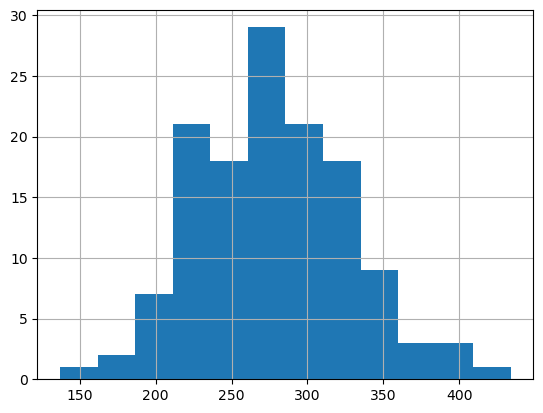

In [3]:
df['oranges'].hist(bins=12);

It has a normal distribution!

In [4]:
df.describe()

,tree_number,oranges
count,133.00000,133.000000
mean,1289.00000,277.852803
std,38.53786,50.922243
min,1223.00000,137.023145
25%,1256.00000,237.696112
50%,1289.00000,279.470482
75%,1322.00000,312.079787
max,1355.00000,434.025714


In [5]:
# Mean of ALL of the number of fruit per tree
population_mean = 271.93

As you can see:
* The mean of the oranges per tree (those that used Fertilizer) : 277.85 kg
* The mean of the oranges per tree (all trees) : 271.93 kg

Is this 6 kg difference reasonable?

In [6]:
stats.ttest_1samp(a=df['oranges'], popmean=population_mean)

TtestResult(statistic=1.3413606837344207, pvalue=0.18210666026278088, df=132)

**pvalue=0.18**

So if we set the threshold to 5%, this fertilizer didn't work properly and we can simply say: "We did not find enough evidence to confirm this claim"

**BUT...!**

We can also give this, or any other fertilizer, a grade!

* Under 5%:  Grade A
* Under 10%: Grade B
* Under 20%: Grade C

And in this case, this fertilizer gets Grade C

### T-Test (Independent)

We use this type of T-Test when we have 2 different sets of data. (Both sets must meet T-Test's conditions)

In this example, we're gonna compare the scores of IELTS Exam between Iranian and iraqi people.



In [7]:
df_ielts_98 = pd.read_csv('ielts_IR.csv')
df_ielts_99 = pd.read_csv('ielts_IRQ.csv')

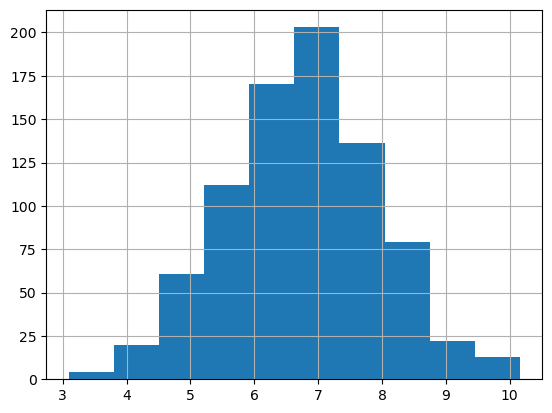

In [8]:
df_ielts_98['ielts'].hist();

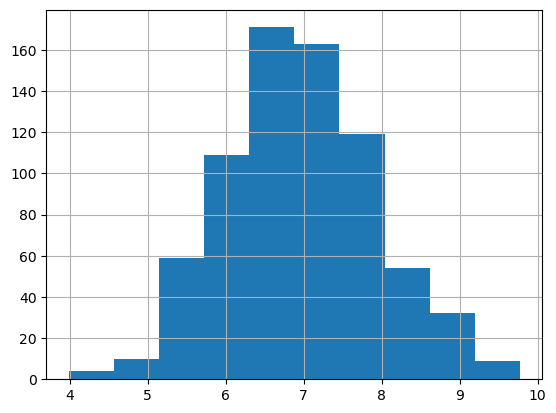

In [9]:
df_ielts_99['ielts'].hist();

They both have a normal distribution!

In [10]:
from scipy.stats import shapiro
shapiro(df_ielts_99['ielts'])

ShapiroResult(statistic=0.9969674348831177, pvalue=0.1879747062921524)

In [11]:
df_ielts_98.head()

,student_code,ielts
0,278917,6.330613
1,278918,7.275424
2,278919,7.012370
3,278920,5.564860
4,278921,5.607750


In [12]:
df_ielts_99.head()

,student_code,ielts
0,3141112,8.725932
1,3141113,8.144126
2,3141114,6.419268
3,3141115,5.458811
4,3141116,9.303161


In [13]:
df_ielts_98.describe()

,student_code,ielts
count,820.000000,820.000000
mean,279326.500000,6.754804
std,236.857904,1.178691
min,278917.000000,3.094945
25%,279121.750000,5.971638
50%,279326.500000,6.775687
75%,279531.250000,7.532372
max,279736.000000,10.159504


In [14]:
df_ielts_99.describe()

,student_code,ielts
count,7.300000e+02,730.000000
mean,3.141476e+06,6.956215
std,2.108771e+02,0.964884
min,3.141112e+06,3.988457
25%,3.141294e+06,6.302632
50%,3.141476e+06,6.912297
75%,3.141659e+06,7.617062
max,3.141841e+06,9.772641


The mean score of Iraninans: 6.75

The mean score of Iraqi people: 6.95

Question: Is this 0.2 difference in points valid?

In [15]:
stats.ttest_ind(a=df_ielts_98['ielts'], b=df_ielts_99['ielts'])

TtestResult(statistic=-3.6538217675570297, pvalue=0.00026698442613130104, df=1548.0)

pvalue=0.0002

It's a really small number! So the difference is logical

### T-Test (Relative)

We use this type of T-Test when both groups A and B are the same person or the same thing. that's why we say Ralative!

A pill that can make you fat in a week! 

Really?! Let's see!

In [16]:
df = pd.read_csv('weights_change.csv')
df.head()

,weight_before,weight_after
0,65.126024,69.579014
1,67.081931,70.142003
2,72.380314,67.482958
3,63.592077,64.890133
4,57.333414,70.430886


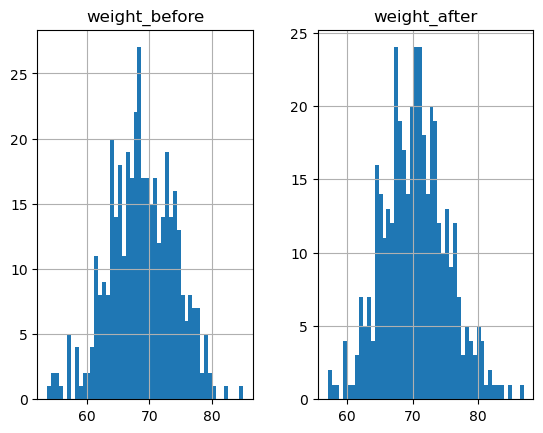

In [17]:
df.hist(bins=50);

In [18]:
df.describe()

,weight_before,weight_after
count,410.000000,410.000000
mean,68.863354,70.425341
std,5.243526,4.975498
min,53.647173,56.991774
25%,65.136296,67.184292
50%,68.669384,70.455450
75%,72.729821,73.506856
max,85.056591,86.939716


In [19]:
stats.ttest_rel(a=df['weight_before'], b=df['weight_after'])

TtestResult(statistic=-4.4624675042842386, pvalue=1.0488324309628723e-05, df=409)

It's a really small number!!!!

So the 2 kg difference is reasonable

**BUT...!**

We did something wrong!

It's completely clear that this 2 kg difference is logical from the prespective of statistics. But are we sure that this difference happened because of the pills? I mean what if we did this experiment in the middle of the holidays?! Obviously people would eat more on this period of time!

Well we can control their diet. This itself has chalanges! When people know that they are being under an experiment, they would get nervous and this stress itself, would cause overeating.

Another way is to bring another group which are chosen randomly from the whole population and would be called A′ and B′ (before and after taking the fake pill..!). We would give them the fake pill and after a week we would compare the difference between A & B and A′ & B′ to make sure that it was the pill that did the magic! or that it was just a bluff.

## U-Test

Now what if the data didn't have a normal distribution...?

Well that's when we use `Mann-Whithny-U-Test`

Imagine we have two classes, g1 & g2. We have the scores of these classes which both do not have a normal distribution. So we can't use T-Test! We can use U-Test. Let's see how it works...!

In [20]:
g1 = [20, 23, 21, 25, 18, 17, 18, 24, 20, 24, 23, 19]
g2 = [24, 25, 21, 22, 23, 28, 24, 27, 21, 23]

In [21]:
print(f'Mean score of class g1: {np.mean(g1)}')
print(f'Mean score of class g2: {np.mean(g2)}')

Mean score of class g1: 21.0
Mean score of class g2: 23.8


Now again, there's a big question you gotta ask yourself...:

Is this difference logical from the prespective of statistics?!

Well let's see!

In [22]:
stats.mannwhitneyu(g1, g2, alternative='two-sided')

MannwhitneyuResult(statistic=28.5, pvalue=0.039413690126797137)

Two sided means that these two groups are different from each other

How likely are these two are different by chance?

pvalue=0.039

So it is valid!

In [23]:
stats.mannwhitneyu(g1, g2, alternative='greater')

MannwhitneyuResult(statistic=28.5, pvalue=0.9832603592232242)

This one (greater) says that what is the probability that g1 is greater than g2 by chance?

Like someone says that the students in calss g1 are smarter than the students in class g2

pvalue=0.983

which is a funny value :)

In [24]:
stats.mannwhitneyu(g1, g2, alternative='less')

MannwhitneyuResult(statistic=28.5, pvalue=0.019706845063398568)

And this one (greater) says that what is the probability that g1 is less than g2 by chance?

Foe example someone says that the students in calss g1 are `Not` smarter than the students in class g2

pvalue=0.019

which is a small number! so it's valid and logical

## Normality Tests

We often use a histogram chart in order to see if our data has a normal distribution. But if we wanted to make sure and be more specific, we would use these normality tests.

### Shapiro Normality test

It simply takes the data and would give the P-value. If the P-value was above 0.05, the data has a normal distribution. Otherwise, it does `not` have a normal distribution. 

Let's see that in action...

In [25]:
data = np.random.normal(loc=20, scale=5, size=5000)
print(data)

[25.483944   19.11167355 20.50441464 ... 18.01675634 15.59231753
 30.94106461]


We just created a data with the mean of 20, the STD of 5, with 5000 samples!

In [26]:
shapiro(data)

ShapiroResult(statistic=0.9994611740112305, pvalue=0.1603633165359497)

pvalue=0.16

So p-value is above 0.05 which is shows that the data has a normal distrbution.

### Probability Plot

This is another test to see if our data has a normal distrbution.

It would give us a plot. The closer the blue points (our data) get to the red line, the more we make sure that the data has a normal distrbution.

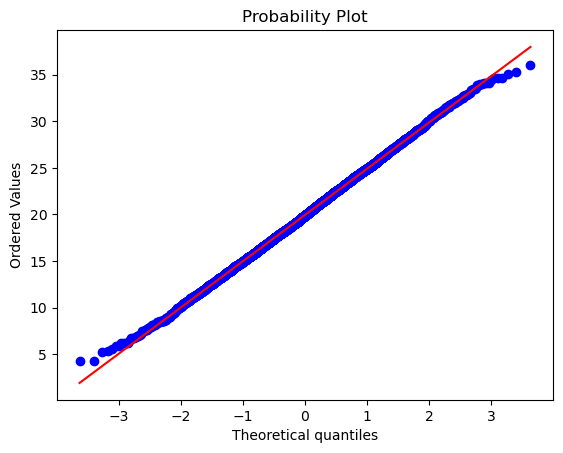

In [29]:
stats.probplot(data, dist='norm', plot=pylab);

## Chi2 Test 

When we normally want to check the relationship (linear relationship) between two columns of a dataframe, we use corrolation. But in some cases we can't use it. Because corrolation only shows linear relationship. What if we wanted to check non-linear relationship?!

When at least on of the 2 columns that we want to check is non-numeric, we use Chi2 Test.

So in this dataset which is about HR, we want to know if there are any relationship between the columns `Attrition` and `job satisfaction`.

In [30]:
data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [31]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [32]:
data.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

In [33]:
data['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [34]:
data['JobSatisfaction'].value_counts()

JobSatisfaction
4    459
3    442
1    289
2    280
Name: count, dtype: int64

In [36]:
ct = pd.crosstab(data['Attrition'], data['JobSatisfaction'], margins=True)
ct

JobSatisfaction,1,2,3,4,All
Attrition,,,,,
No,223,234,369,407,1233
Yes,66,46,73,52,237
All,289,280,442,459,1470


Let's make Chi2 test ourselves. Then we would see the ready function in stats

In [37]:
obs = np.append(ct.iloc[0][: -1].values, ct.iloc[1][: -1].values)

In [38]:
ct.iloc[0] / 1233

JobSatisfaction
1      0.180860
2      0.189781
3      0.299270
4      0.330089
All    1.000000
Name: No, dtype: float64

In [39]:
ct.iloc[1] / 237

JobSatisfaction
1      0.278481
2      0.194093
3      0.308017
4      0.219409
All    1.000000
Name: Yes, dtype: float64

In [40]:
ct.iloc[0][: -1]

JobSatisfaction
1    223
2    234
3    369
4    407
Name: No, dtype: int64

In [41]:
(ct.iloc[0] / 1233) - (ct.iloc[1] / 237)

JobSatisfaction
1     -0.097621
2     -0.004312
3     -0.008747
4      0.110680
All    0.000000
dtype: float64

In [42]:
obs

array([223, 234, 369, 407,  66,  46,  73,  52], dtype=int64)

In [43]:
row_sum = ct.iloc[0: 2, 4].values
row_sum

array([1233,  237], dtype=int64)

In [44]:
ct.loc['All', 'All']

1470

In [45]:
exp = []
for j in range(2):
    for val in ct.iloc[2, : -1].values:
        print(val, ' * ', row_sum[j], ' / ', ct.loc['All', 'All'], ' = ', val * row_sum[j] / ct.loc['All', 'All'])
        exp.append(val * row_sum[j] / ct.loc['All', 'All'])

289  *  1233  /  1470  =  242.4061224489796
280  *  1233  /  1470  =  234.85714285714286
442  *  1233  /  1470  =  370.7387755102041
459  *  1233  /  1470  =  384.99795918367346
289  *  237  /  1470  =  46.593877551020405
280  *  237  /  1470  =  45.142857142857146
442  *  237  /  1470  =  71.26122448979592
459  *  237  /  1470  =  74.00204081632653


In [46]:
exp

[242.4061224489796,
 234.85714285714286,
 370.7387755102041,
 384.99795918367346,
 46.593877551020405,
 45.142857142857146,
 71.26122448979592,
 74.00204081632653]

In [47]:
ct.iloc[2, : -1].values

array([289, 280, 442, 459], dtype=int64)

In [48]:
obs

array([223, 234, 369, 407,  66,  46,  73,  52], dtype=int64)

In [49]:
exp

[242.4061224489796,
 234.85714285714286,
 370.7387755102041,
 384.99795918367346,
 46.593877551020405,
 45.142857142857146,
 71.26122448979592,
 74.00204081632653]

In [50]:
((obs - exp) ** 2 / exp).sum()

17.505077010348

In [51]:
dof = (len(row_sum) - 1) * (len(ct.iloc[2, :-1].values) - 1)
dof

3

In [52]:
# Attrition vs JobSatisfaction
1 - stats.chi2.cdf(((obs - exp) ** 2 / exp).sum(), dof)

0.000556300451038716

Thats the p-value! it is under 0.05 so they are ralative

Now let's see the it's built-in function

In [53]:
d = np.array([ct.iloc[0][: -1].values, ct.iloc[1][: -1].values])
d

array([[223, 234, 369, 407],
       [ 66,  46,  73,  52]], dtype=int64)

In [54]:
stats.chi2_contingency(d)

Chi2ContingencyResult(statistic=17.505077010348, pvalue=0.0005563004510387556, dof=3, expected_freq=array([[242.40612245, 234.85714286, 370.73877551, 384.99795918],
       [ 46.59387755,  45.14285714,  71.26122449,  74.00204082]]))

See!!! pvalue=0.0005

They have relationship

In [55]:
from scipy.stats import chisquare
chisquare(d)

Power_divergenceResult(statistic=array([ 85.29065744, 126.22857143, 198.22624434, 274.56427015]), pvalue=array([2.57577384e-20, 2.74031376e-29, 5.09229443e-45, 1.14862090e-61]))

In [56]:
# Attrition and Education
ct = pd.crosstab(data['Attrition'], data['Education'], margins=True)
ct

Education,1,2,3,4,5,All
Attrition,,,,,,
No,139,238,473,340,43,1233
Yes,31,44,99,58,5,237
All,170,282,572,398,48,1470


In [57]:
d = np.array([ct.iloc[0][: -1].values, ct.iloc[1][: -1].values])
d

array([[139, 238, 473, 340,  43],
       [ 31,  44,  99,  58,   5]], dtype=int64)

In [58]:
stats.chi2_contingency(d)

Chi2ContingencyResult(statistic=3.0739613982367193, pvalue=0.5455253376565949, dof=4, expected_freq=array([[142.59183673, 236.53469388, 479.77959184, 333.83265306,
         40.26122449],
       [ 27.40816327,  45.46530612,  92.22040816,  64.16734694,
          7.73877551]]))

pvalue=0.54

Oh! it's a large number! So these two means `Attrition` and `Education` does not have a really noticable relationship!

<div style=" padding: 40px; text-align: left; color: #535453;">
    Notebook by:
    <h2 style="font-family: 'calibri', sans-serif;ext-align: center;  font-size: 50px; margin-top: 0; margin-bottom: 20px;">
    Elyas Najafi
    </h2>
</div>